In [12]:
import loader
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [22]:
rets = loader.load_dataset(loader.train_path, loader.test_path)

Existing file 'dataset.npz' found.
10.60 Loaded data.


In [23]:
trainX, trainY = rets[0], rets[1]
testX, testY = rets[2], rets[3]

In [24]:
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(60498, 100, 100, 3) (60498,)
(20622, 100, 100, 3) (20622,)


In [63]:
trainX[trainY ==0][0].shape

(100, 100, 3)

In [25]:
numOfClasses = 120
fruitSamples = np.zeros((numOfClasses,100,100,3))
for i in range(numOfClasses):
    fruitSamples[i] = trainX[trainY == i][0]
    

In [64]:
                        
trainX = fruitSamples
trainY = np.arange(numOfClasses).reshape(-1,1)
testX  = fruitSamples
testY  = np.arange(numOfClasses).reshape(-1,1)
trainMean = 1
trainStd = 1
testMean = 1
testStd = 1
                        

In [36]:
np.savez('fruit_samples.npz',
          train_x = trainX,
          train_y = trainY,
          test_x = testX,
         test_y =testY,
         train_mean = trainMean,
         train_std = trainStd,
         test_mean = testMean,
         test_std = testStd
        )

### generate dummy data for debugging

In [8]:
trainX = np.ones((64,100,100,3))
trainY = np.ones((64,1))
testX  = np.ones((64,100,100,3))
testY  = np.ones((64,1))
trainMean = 1
trainStd = 1
testMean = 1
testStd = 1

In [9]:
np.savez('dummy.npz',
          train_x = trainX,
          train_y = trainY,
          test_x = testX,
         test_y =testY,
         train_mean = trainMean,
         train_std = trainStd,
         test_mean = testMean,
         test_std = testStd
        )

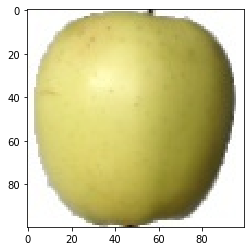

In [26]:
plt.imshow(fruitSamples[3].astype("int"))
plt.show()

In [91]:
fruitSamples[0][:,:,2]

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

In [45]:
data1 = torch.zeros((60,3,100,100))
data2 = torch.ones((60,3,100,100))
data3 = torch.rand((32,3,100,100))
print(fruitSamples.shape)
data = torch.cat([torch.from_numpy(fruitSamples[0:32]), torch.from_numpy(fruitSamples[32:64])],0).float().permute(0,3,1,2)/255
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

(120, 100, 100, 3)


In [50]:
#inExamples = [data[0:32], data[32:64]]
print(data.shape)
c = torch.cat([data, data3], 0)
print(c.shape)

i=torchvision.utils.make_grid(c, nrow = 32)
torchvision.utils.save_image(i,'dummyGrid.png')

torch.Size([64, 3, 100, 100])
torch.Size([96, 3, 100, 100])
